<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Ch9_DimensionReduc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 4/bargainnumeric.xlsx')

In [ ]:
ecom = pd.read_csv("/content/drive/MyDrive/BI BA Handbook/Chapter 9/EcommerceCustomers.csv")

eCommerce dataset from https://www.kaggle.com/datasets/iabdulw/ecommerce-customer-data

In [ ]:
fash = pd.read_csv("/content/drive/MyDrive/BI BA Handbook/Chapter 9/fashion-mnist_test.csv")

Fashion dataset from https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [ ]:
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
ecom = ecom[ecom.columns[3:]]

In [ ]:
scaler = StandardScaler()
scale_data = scaler.fit_transform(ecom)

In [ ]:
pca = PCA(n_components=4)
pca.fit_transform(scale_data)

array([[ 1.66315443, -1.33260135, -2.18941993, -0.96002709],
       [-2.06781006, -0.15549918,  0.4546851 , -0.54918684],
       [-0.04245199,  0.50581981,  0.1131903 , -0.76636623],
       ...,
       [ 0.96278325, -0.38005711,  0.07555185, -1.86016248],
       [-0.86974175, -0.18252941, -0.43555094,  0.98895066],
       [-0.15425119,  0.72081581, -0.10356922,  1.50874353]])

In [ ]:
vr = sum(pca.explained_variance_ratio_)

In [ ]:
vr

0.8213104477764983

In [ ]:
nums = range(0, 5+1)

In [ ]:
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scale_data)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

In [ ]:
import matplotlib.pyplot as plt

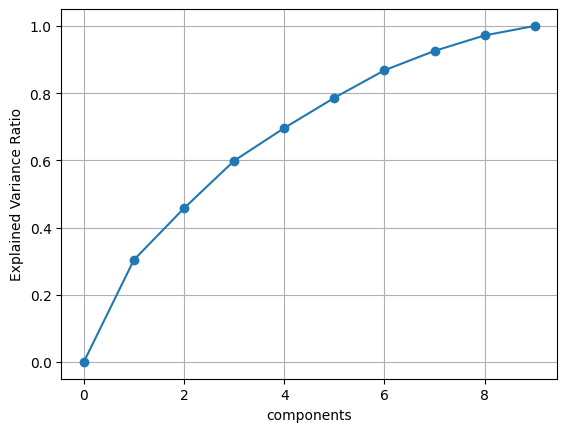

In [ ]:
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
df2.head()

,Respondent,Q1,Q2,Q3,Q4a,Q5,Q6,Q7,Q8a,Q8b,...,Q13,Q14,Q15,Q17,Q18,Q20,Q22,Q23,Q24,Q24a
0,1,5,2,3.0,7.0,2,1,2,1,3,...,4,4,4,0.0,4,4,1,3,15.0,3.0
1,2,1,2,1.0,6.0,1,3,1,3,4,...,3,1,2,0.0,3,4,2,1,2.0,1.0
2,3,3,1,NaN,NaN,2,1,2,3,1,...,1,3,3,0.0,3,5,2,1,NaN,NaN
3,4,3,1,NaN,NaN,3,4,2,3,2,...,5,4,2,0.0,4,4,1,3,1.0,1.0
4,5,2,2,3.0,1.0,1,3,2,2,3,...,2,2,2,0.0,2,2,3,2,6.0,2.0


In [ ]:
df_likert = df2[["Q6", "Q10", "Q11", "Q12", "Q13", "Q14", "Q15", "Q18", "Q20"]].copy()

In [ ]:
df_likert = df_likert.dropna()

In [ ]:
scaler = StandardScaler()
scale_data = scaler.fit_transform(df_likert)

In [ ]:
nums = range(0, 9+1)

In [ ]:
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scale_data)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

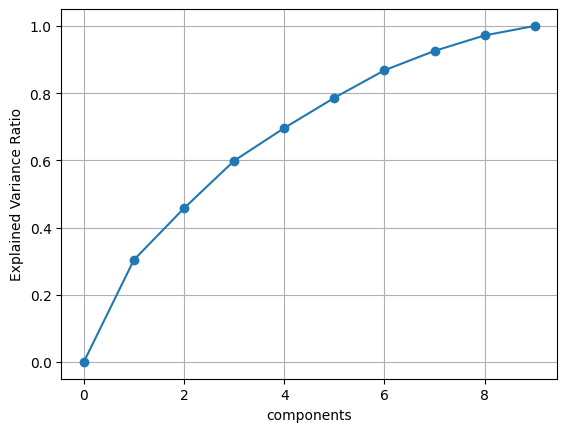

In [ ]:
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
x = mnist["data"]

In [ ]:
x = x[:10000]

In [ ]:
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
examp = x.iloc[2]
examp

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 2, Length: 784, dtype: float64

In [ ]:
examp_image= np.reshape(np.ravel(examp), (28, 28))

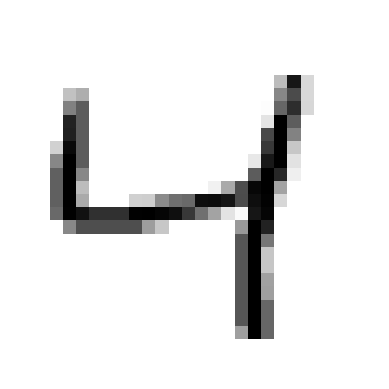

In [ ]:
plt.imshow(examp_image,cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
examp2 = x.iloc[5]
examp2

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 5, Length: 784, dtype: float64

In [ ]:
examp_image= np.reshape(np.ravel(examp2), (28, 28))

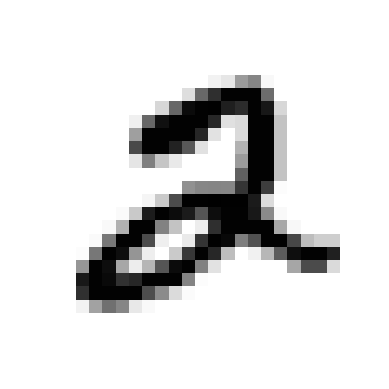

In [ ]:
plt.imshow(examp_image,cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
batch_size = None

In [ ]:
scaler = StandardScaler()
scale_data = scaler.fit_transform(x)

In [ ]:
nums = range(100, 784+1, 50)

In [ ]:
var_ratio = []
for num in nums:
  ipca = IncrementalPCA(n_components=num, batch_size=batch_size)
  ipca.fit(scale_data)
  var_ratio.append(np.sum(ipca.explained_variance_ratio_))

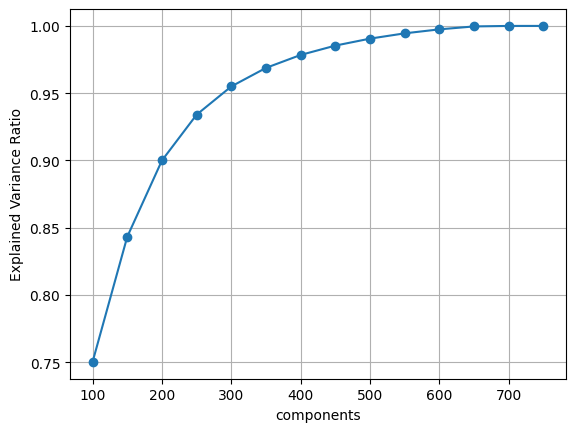

In [ ]:
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

In [ ]:
ipca = IncrementalPCA(n_components=200)
x_new = ipca.fit_transform(scale_data)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
x_train, x_test = x[:8000], x[8001:10000]

In [ ]:
y = mnist["target"]

In [ ]:
y_train, y_test = y[:8000], y[8001:10000]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred

array(['6', '2', '0', ..., '6', '9', '7'], dtype=object)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9349674837418709

In [ ]:
x_train, x_test = x_new[:8000], x_new[8001:10000]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred

array(['6', '2', '0', ..., '6', '9', '7'], dtype=object)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9059529764882441

### Sparse PCA

In [ ]:
from sklearn.decomposition import SparsePCA

In [ ]:
alpha = 0.0001

In [ ]:
scaler = StandardScaler()
scale_data = scaler.fit_transform(x)

In [ ]:
spca = SparsePCA(n_components=200, alpha=alpha)
x_spca = spca.fit_transform(scale_data)

In [ ]:
np.mean(spca.components_ == 0)

0.14177933673469387

In [ ]:
x_train, x_test = x_spca[:8000], x_spca[8001:10000]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred

array(['6', '2', '0', ..., '6', '9', '7'], dtype=object)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9054527263631816

In [ ]:
spca = SparsePCA(n_components=100, alpha=alpha)
x_spca = spca.fit_transform(scale_data)

In [ ]:
np.mean(spca.components_ == 0)

0.14170918367346938

In [ ]:
x_train, x_test = x_spca[:8000], x_spca[8001:10000]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred

array(['6', '2', '0', ..., '6', '9', '7'], dtype=object)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.912456228114057

In [ ]:
spca = SparsePCA(n_components=50, alpha=alpha)
x_spca = spca.fit_transform(scale_data)

In [ ]:
np.mean(spca.components_ == 0)

0.14165816326530611

In [ ]:
x_train, x_test = x_spca[:8000], x_spca[8001:10000]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred

array(['6', '2', '0', ..., '6', '9', '7'], dtype=object)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.919959979989995

In [ ]:
alpha = 0.000001

In [ ]:
spca = SparsePCA(n_components=50, alpha=alpha)
x_spca = spca.fit_transform(scale_data)

In [ ]:
np.mean(spca.components_ == 0)

0.14165816326530611

In [ ]:
x_train, x_test = x_spca[:8000], x_spca[8001:10000]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred

array(['6', '2', '0', ..., '6', '9', '7'], dtype=object)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.919959979989995

In [ ]:
spca = SparsePCA(n_components=10, alpha=alpha)
x_spca = spca.fit_transform(scale_data)

In [ ]:
np.mean(spca.components_ == 0)

0.14158163265306123

In [ ]:
x_train, x_test = x_spca[:8000], x_spca[8001:10000]

In [ ]:
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred

array(['6', '2', '0', ..., '6', '9', '7'], dtype=object)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8674337168584292

### Kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA(n_components=50, kernel="linear")
x_kpca = kpca.fit_transform(scale_data)

In [ ]:
x_train, x_test = x_kpca[:8000], x_kpca[8001:10000]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred

array(['6', '2', '0', ..., '6', '9', '7'], dtype=object)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.919959979989995

In [ ]:
kpca = KernelPCA(n_components=50, kernel="poly")
x_kpca = kpca.fit_transform(scale_data)

In [ ]:
x_train, x_test = x_kpca[:8000], x_kpca[8001:10000]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9024512256128064

## Singular Value Decomposition (SVD)

### Latent Semantic Analysis (LSA)

In [ ]:
!pip install textract

Run install twice

In [ ]:
import textract

In [ ]:
aieu = textract.process("/content/drive/MyDrive/BI BA Handbook/Chapter 7/aieu.pdf")
aieu = aieu.decode("utf-8")

In [ ]:
aius = textract.process("/content/drive/MyDrive/BI BA Handbook/Chapter 7/aius.pdf")
aius = aius.decode("utf-8")

In [ ]:
aican = textract.process("/content/drive/MyDrive/BI BA Handbook/Chapter 7/aican1.pdf")
aican = aican.decode("utf-8")

In [ ]:
aican2 = textract.process("/content/drive/MyDrive/BI BA Handbook/Chapter 7/aican2.pdf")
aican2 = aican2.decode("utf-8")

In [ ]:
rdp = textract.process("/content/drive/MyDrive/BI BA Handbook/Chapter 7/RDPaf.pdf")
rdp = rdp.decode("utf-8")

In [ ]:
import re

In [ ]:
def clean_text(text):
    text = re.sub('\xa0', ' ', text)
    text = re.sub('\n•', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\ue080', ' ', text)
    text = re.sub('\x0c', ' ', text)
    html = re.compile('[<,#*?>]')
    text = html.sub(r' ',text)
    url = re.compile('https?://\S+|www\.S+')
    text = url.sub(r' ',text)
    email = re.compile('[A-Za-z0-2]+@[\w]+.[\w]+')
    text = email.sub(r' ',text)
    return text

In [ ]:
aican = clean_text(aican)

In [ ]:
aius = clean_text(aius)

In [ ]:
aieu = clean_text(aieu)

In [ ]:
aican2 = clean_text(aican2)

In [ ]:
rdp = clean_text(rdp)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def TFIDF_tokenize(text):
    tfidf = TfidfVectorizer(stop_words="english")
    tfidf_mat = tfidf.fit_transform(text)
    words = tfidf.get_feature_names_out(text)
    return tfidf_mat, words

In [ ]:
text = [aican, aius, aieu, aican2, rdp]

In [ ]:
tfidf_mat, words  = TFIDF_tokenize(text)

In [ ]:
df_tf_idf = pd.DataFrame(tfidf_mat.toarray(), columns = words)

In [ ]:
df_tf_idf

,00030459,01,02,03,04,05,06,08,09,10,...,zaller,zational,zeide,zero,zettabytes,zhang,zhukov,ziad,zuboff,zucked
0,0.00000,0.003438,0.00000,0.0000,0.000000,0.0000,0.004262,0.00000,0.004262,0.074429,...,0.0000,0.00000,0.00000,0.006877,0.000000,0.004262,0.004262,0.00000,0.00000,0.0000
1,0.00195,0.003146,0.00195,0.0039,0.004720,0.0039,0.000000,0.00195,0.000000,0.013182,...,0.0039,0.00195,0.00195,0.001573,0.000000,0.000000,0.000000,0.00585,0.00195,0.0039
2,0.00000,0.000000,0.00000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.009581,...,0.0000,0.00000,0.00000,0.000000,0.006802,0.000000,0.000000,0.00000,0.00000,0.0000
3,0.00000,0.000000,0.00000,0.0000,0.009068,0.0000,0.000000,0.00000,0.000000,0.113978,...,0.0000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000
4,0.00000,0.000000,0.00000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,...,0.0000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0000


In [ ]:
table1 = df_tf_idf.iloc[0].T.sort_values(ascending=False)
table1

generative     0.639247
ai             0.453777
use            0.215254
2023           0.213173
tools          0.156061
                 ...   
exerts         0.000000
exer           0.000000
exempted       0.000000
exemplified    0.000000
zucked         0.000000
Name: 0, Length: 5445, dtype: float64

In [ ]:
table2 = df_tf_idf.iloc[1].T.sort_values(ascending=False)
table2

systems      0.329562
data         0.311261
automated    0.277931
use          0.171890
ai           0.139515
               ...   
pursuit      0.000000
pursued      0.000000
pursue       0.000000
brings       0.000000
importer     0.000000
Name: 1, Length: 5445, dtype: float64

In [ ]:
table3 = df_tf_idf.iloc[2].T.sort_values(ascending=False)
table3

ai         0.582521
eu         0.333319
europe     0.214277
data       0.192863
systems    0.141798
             ...   
girl       0.000000
girls      0.000000
gists      0.000000
github     0.000000
zucked     0.000000
Name: 2, Length: 5445, dtype: float64

In [ ]:
table4 = df_tf_idf.iloc[3].T.sort_values(ascending=False)
table4

decision           0.449579
directive          0.301087
automated          0.284945
canada             0.203234
level              0.177299
                     ...   
environmentally    0.000000
environmental      0.000000
entry              0.000000
entrusted          0.000000
zucked             0.000000
Name: 3, Length: 5445, dtype: float64

In [ ]:
table5 = df_tf_idf.iloc[4].T.sort_values(ascending=False)
table5

freedom        0.507254
academic       0.492761
polytechnic    0.367891
faculty        0.296812
deer           0.151484
                 ...   
end            0.000000
encroach       0.000000
encourage      0.000000
encounters     0.000000
zucked         0.000000
Name: 4, Length: 5445, dtype: float64

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

In [ ]:
svd = TruncatedSVD(n_components=2)
svd_text = svd.fit_transform(df_tf_idf)

In [ ]:
kmeans = KMeans(n_clusters=2)
kmean_text = kmeans.fit_predict(svd_text)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
titles = ["AICAN","AIUS", "AIEU", "AICAN2", "RDP"]

In [ ]:
df = pd.DataFrame({'labels': kmean_text, 'docs': titles})
df.sort_values('labels')

,labels,docs
0,0,AICAN
1,0,AIUS
2,0,AIEU
3,0,AICAN2
4,1,RDP


## Creating Pipelines to Simplify Code

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
svd = TruncatedSVD(n_components=2)
kmeans = KMeans(n_clusters=2)

pipeline = make_pipeline(svd, kmeans)

pipeline.fit(df_tf_idf)
labels = pipeline.predict(df_tf_idf )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels

array([0, 0, 0, 0, 1], dtype=int32)

In [ ]:
svd = TruncatedSVD(n_components=3)
kmeans = KMeans(n_clusters=3)

pipeline = make_pipeline(svd, kmeans)

pipeline.fit(df_tf_idf)
labels = pipeline.predict(df_tf_idf )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels

array([0, 0, 0, 2, 1], dtype=int32)

## Swiss Roll

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn import datasets

In [ ]:
sr_points, sr_color = datasets.make_swiss_roll(n_samples=1500, random_state=0)

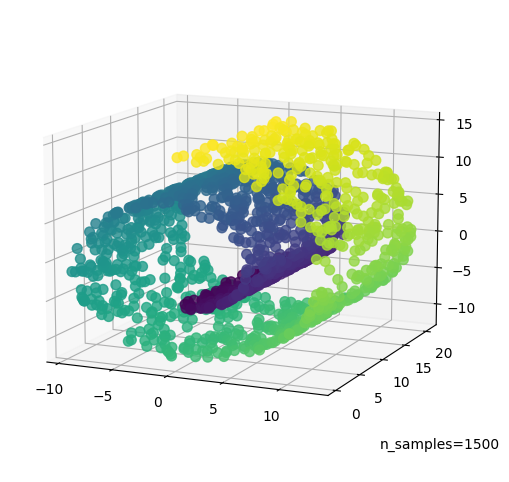

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
  )
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(sr_points)
np.sum(pca.explained_variance_ratio_)

0.7145026866231369

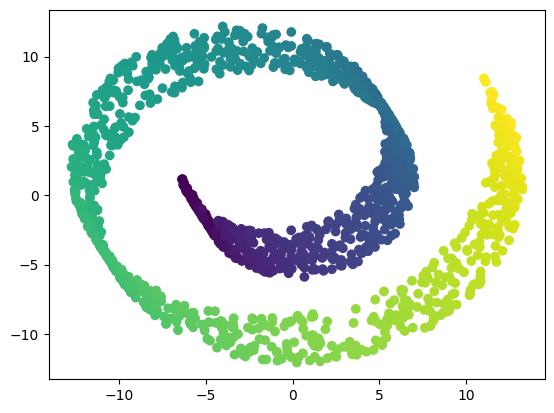

In [ ]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=sr_color)
plt.show()

## Isomap

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
iso = Isomap(n_components=2)
x_iso = iso.fit_transform(sr_points)

In [ ]:
iso.reconstruction_error()


20.406922535880234

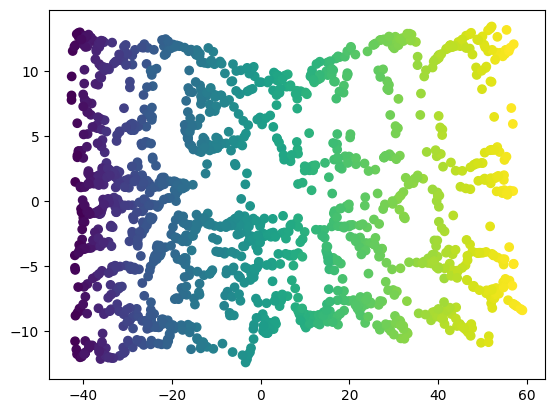

In [ ]:
plt.scatter(x_iso[:, 0], x_iso[:, 1], c=sr_color)
plt.show()

## LLE

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

In [ ]:
lle = LocallyLinearEmbedding(n_components=2)
x_lle = lle.fit_transform(sr_points)

In [ ]:
lle.reconstruction_error_

2.880047462549397e-12

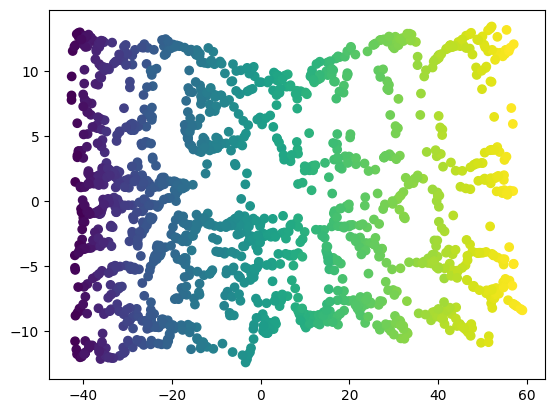

In [ ]:
plt.scatter(x_iso[:, 0], x_iso[:, 1], c=sr_color)
plt.show()

## t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, perplexity=5)
x_tsne = tsne.fit_transform(sr_points)

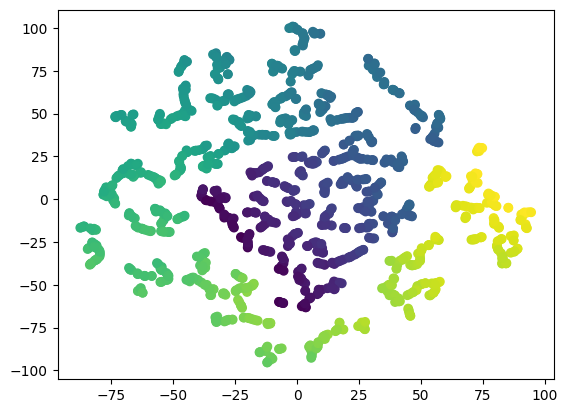

In [ ]:
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=sr_color)
plt.show()

In [ ]:
tsne = TSNE(n_components=2, perplexity=30)
x_tsne = tsne.fit_transform(sr_points)

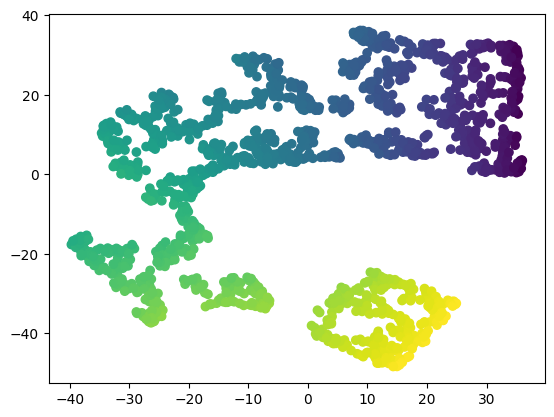

In [ ]:
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=sr_color)
plt.show()

## Fashion MNIST

In [ ]:
fash.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fash_image = fash[fash.columns[1:]]

In [ ]:
fash_label = fash["label"]

In [ ]:
examp = fash_image.iloc[2]
examp

pixel1       0
pixel2       0
pixel3       0
pixel4       0
pixel5       0
            ..
pixel780    53
pixel781    31
pixel782     0
pixel783     0
pixel784     0
Name: 2, Length: 784, dtype: int64

In [ ]:
examp_image= np.reshape(np.ravel(examp), (28, 28))

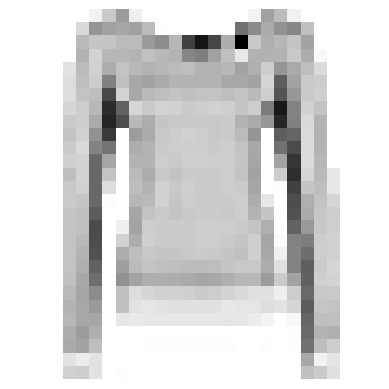

In [ ]:
plt.imshow(examp_image,cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
fash_label.iloc[2]

2

In [ ]:
examp2 = fash_image.iloc[15]
examp2

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 15, Length: 784, dtype: int64

In [ ]:
examp_image= np.reshape(np.ravel(examp2), (28, 28))

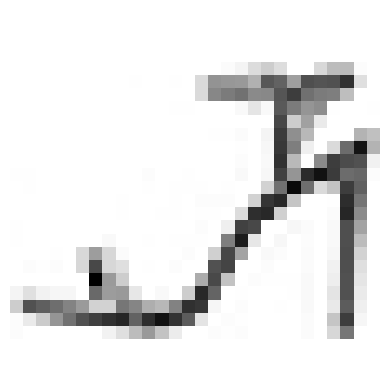

In [ ]:
plt.imshow(examp_image,cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
fash_label.iloc[15]

5

In [ ]:
y_train, y_test = fash_label[:8000], fash_label[8001:10000]
x_train, x_test = fash_image[:8000], fash_image[8001:10000]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn.predict(x_test)
y_pred

array([7, 7, 7, ..., 8, 8, 2])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8314157078539269

In [ ]:
iso = Isomap(n_components=10)
x_iso = iso.fit_transform(fash_image)

In [ ]:
y_train, y_test = fash_label[:8000], fash_label[8001:10000]

In [ ]:
x_train, x_test = x_iso[:8000], x_iso[8001:10000]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn.predict(x_test)
y_pred

array([7, 7, 7, ..., 8, 6, 2])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7968984492246123

In [ ]:
examp3 = fash_image.iloc[9001]
examp3

pixel1        0
pixel2        0
pixel3        0
pixel4        0
pixel5        0
           ... 
pixel780    120
pixel781      0
pixel782      0
pixel783      0
pixel784      0
Name: 9001, Length: 784, dtype: int64

In [ ]:
examp_image= np.reshape(np.ravel(examp3), (28, 28))

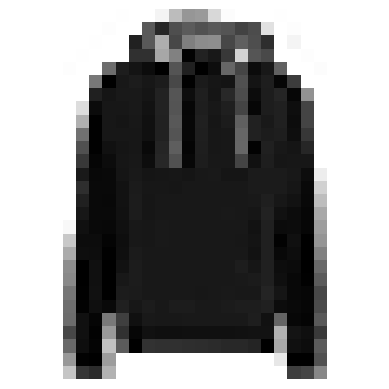

In [ ]:
plt.imshow(examp_image,cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
y_pred[1000]

4

In [ ]:
fash_label[9001]

2

In [ ]:
lle = LocallyLinearEmbedding(n_components=10)
x_lle = lle.fit_transform(fash_image)

In [ ]:
y_train, y_test = fash_label[:8000], fash_label[8001:10000]

In [ ]:
x_train, x_test = x_lle[:8000], x_lle[8001:10000]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn.predict(x_test)
y_pred

array([7, 7, 7, ..., 8, 2, 2])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7688844422211105

In [ ]:
y_pred[1000]

4

In [ ]:
tsne = TSNE(n_components=2, perplexity=5)
x_tsne = tsne.fit_transform(fash_image)

In [ ]:
y_train, y_test = fash_label[:8000], fash_label[8001:10000]

In [ ]:
x_train, x_test = x_iso[:8000], x_iso[8001:10000]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn.predict(x_test)
y_pred

array([7, 7, 7, ..., 8, 6, 2])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7968984492246123

In [ ]:
y_pred[1000]

4

In [ ]:
tsne = TSNE(n_components=2, perplexity=30)
x_tsne = tsne.fit_transform(fash_image)

In [ ]:
y_train, y_test = fash_label[:8000], fash_label[8001:10000]

In [ ]:
x_train, x_test = x_iso[:8000], x_iso[8001:10000]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn.predict(x_test)
y_pred

array([7, 7, 7, ..., 8, 6, 2])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7968984492246123

In [ ]:
y_pred[1000]

4